In [57]:
import edward as ed
import tensorflow as tf
from edward.models import Bernoulli, Normal, Empirical

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jupyterthemes import jtplot
jtplot.style('oceans16')

%matplotlib inline

In [5]:
flip = Bernoulli(probs=0.5)

In [6]:
sess = ed.get_session()

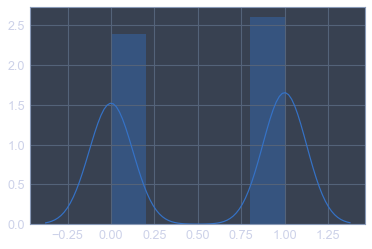

In [11]:
sns.distplot(flip.sample(1000).eval())

Using flip we can construct more complex expressions that describe more complicated sampling processes. For instance here we describe a process that samples a number adding up several flips (note that in JavaScript a boolean will be turned into a number, 00 or 11, by the plus operator +):

In [40]:
sess.run(flip) + sess.run(flip) + sess.run(flip)

2

Important note: sess.run(flip+flip+flip) only evaluates flip once and then sums it. You need to run each instance separately

What if we want to invoke this sampling process multiple times? We would like to construct a stochastic function that adds three random numbers each time it is called. We can use function to construct such complex stochastic functions from the primitive ones.

In [35]:
def sumFlips():
    return sess.run(flip) + sess.run(flip) + sess.run(flip)

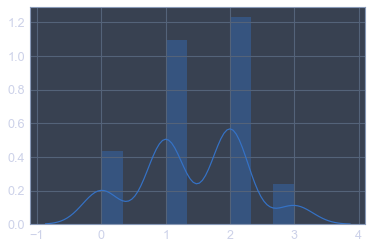

In [41]:
num_iter = 200
summed_flips = np.zeros((num_iter, 1))
for ind in range(num_iter):
    summed_flips[ind,:] = sumFlips()
    
sns.distplot(summed_flips)

In [73]:
# Marginal:
def foo(n_samples):
    return Normal(0., 1.).sample(n_samples) * Normal(0., 1.).sample(n_samples)

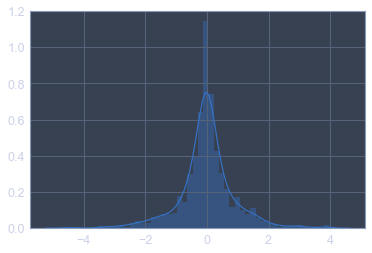

In [56]:
sns.distplot(foo(1000).eval())